In [1]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 42.37 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [4]:
ls

gdrive/  sample_data/  YoloV3/


In [6]:
!cp /content/gdrive/My\ Drive/Assignment13.zip ./
!unzip -q Assignment13.zip

In [7]:
cd YoloV3/

/content/YoloV3


In [10]:
!mkdir weights
!cp /content/gdrive/My\ Drive/yolov3-spp-ultralytics.pt ./weights/

In [8]:
!ls

 annotation_tool   labels	  results.png	    train_batch0.png
 cfg		   models.py	  results.txt	    train.py
 custom.data	   output	  runs		   'ubdivisions=1'
 data		   __pycache__	  test_batch0.png   utils
 detect.py	   README.md	  test.py	    vim.exe.stackdump
 images		   results.json   ting		    weights


In [22]:
!python -O train.py --data custom.data --batch 20 --cache --cfg cfg/yolov3-custom-a13.cfg --epochs 40 --nosave

Namespace(accumulate=4, adam=False, batch_size=20, bucket='', cache_images=True, cfg='cfg/yolov3-custom-a13.cfg', data='custom.data', device='', epochs=40, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-23 16:15:59.547900: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2863 found, 131 missing, 38 empty, 0 duplicate, for 3032 images): 100% 3032/3032 [00:00<00:00, 10249.46it/s]
Caching images (1.7GB): 100% 3032/3032 [00:21<00:00, 142.90it/s]
Caching labels (296 found, 14 missing, 7 empty, 0 duplicate, for 317 images): 100% 317/317 [00:00<00:0

# Inference

In [26]:
!python detect.py --conf-thres 0.1 --output out_out --cfg cfg/yolov3-custom-a13.cfg --names /content/YoloV3_Dataset/classes.txt --source inference

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom-a13.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='/content/YoloV3_Dataset/classes.txt', output='out_out', save_txt=False, source='inference', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/2 inference/EiwX8E_XcAEf4XR.jpg: 448x512 4 hardhats, 4 vests, 4 masks, 7 bootss, Done. (0.042s)
image 2/2 inference/ezgif.com-gif-maker.jpg: 512x320 1 hardhats, 1 vests, 1 masks, Done. (0.030s)
Results saved to /content/YoloV3/out_out
Done. (0.174s)


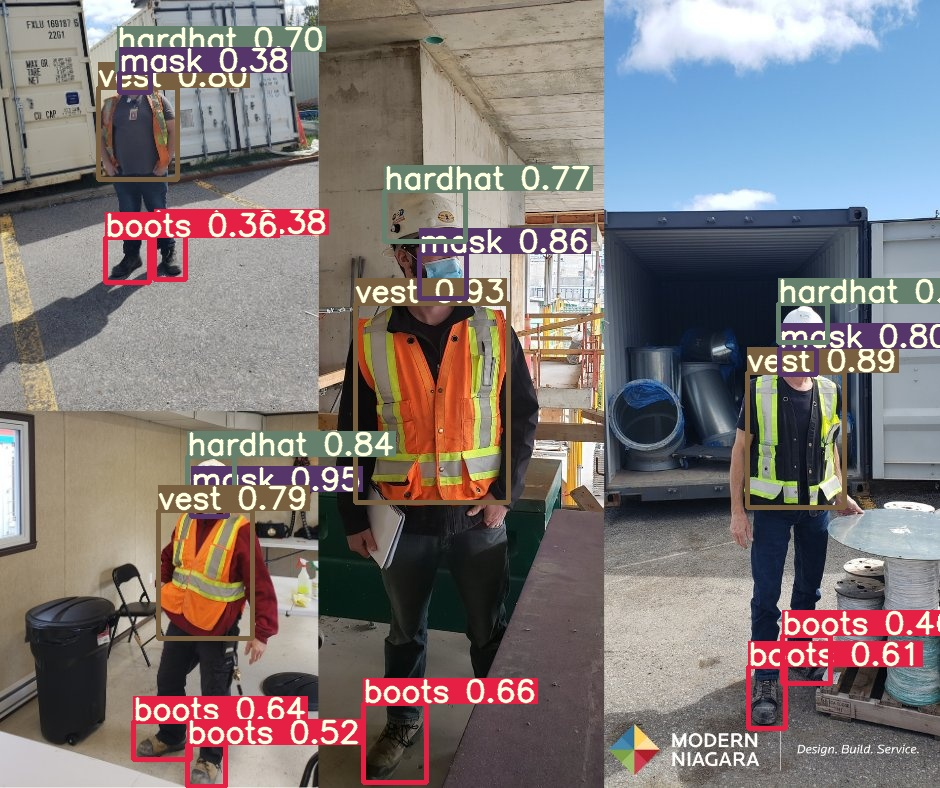

In [27]:
Image(filename='/content/YoloV3/out_out/EiwX8E_XcAEf4XR.jpg', width=600)

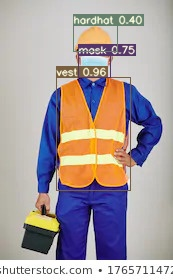

In [28]:
Image(filename='/content/YoloV3/out_out/ezgif.com-gif-maker.jpg', width=600)

In [10]:
!cp /content/gdrive/My\ Drive/EVA5/last.pt .

In [29]:
!cp  /content/YoloV3/weights/last.pt /content/gdrive/My\ Drive/EVA5

# Video

In [11]:
!ffmpeg -i "/content/YoloV3/Face mask distribution on Site to break the chain of COVID-19.mp4" frames/out-%03d.jpg

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [12]:
!python detect.py --conf-thres 0.1 --output out_frames --cfg cfg/yolov3-custom-a13.cfg --names /content/YoloV3_Dataset/classes.txt --source frames

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom-a13.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='/content/YoloV3_Dataset/classes.txt', output='out_frames', save_txt=False, source='frames', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/4899 frames/out-001.jpg: 320x512 11 hardhats, 9 vests, 3 masks, 7 bootss, Done. (0.033s)
image 2/4899 frames/out-002.jpg: 320x512 10 hardhats, 10 vests, 4 masks, 10 bootss, Done. (0.033s)
image 3/4899 frames/out-003.jpg: 320x512 8 hardhats, 9 vests, 4 masks, 12 bootss, Done. (0.033s)
image 4/4899 frames/out-004.jpg: 320x512 10 hardhats, 9 vests, 3 masks, 10 bootss, Done. (0.033s)
image 5/4899 frames/out-005.jpg: 320x512 9 hardhats, 9 vests, 3 masks, 10 bootss, Done. (0.032s)
image 6/4899 frames/out-006.jpg: 320x512 

In [13]:
!ffmpeg -i out_frames/out-%03d.jpg test_output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

# Video 2

In [14]:
!ffmpeg -i "/content/YoloV3/Junkee Giving Masks To Construction Workers.mp4" frames1/out-%03d.jpg

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [16]:
!python detect.py --conf-thres 0.1 --output out_frames1 --cfg cfg/yolov3-custom-a13.cfg --names /content/YoloV3_Dataset/classes.txt --source frames1

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom-a13.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='/content/YoloV3_Dataset/classes.txt', output='out_frames1', save_txt=False, source='frames1', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/2759 frames1/out-001.jpg: 320x512 Done. (0.033s)
image 2/2759 frames1/out-002.jpg: 320x512 Done. (0.033s)
image 3/2759 frames1/out-003.jpg: 320x512 Done. (0.033s)
image 4/2759 frames1/out-004.jpg: 320x512 Done. (0.025s)
image 5/2759 frames1/out-005.jpg: 320x512 Done. (0.024s)
image 6/2759 frames1/out-006.jpg: 320x512 Done. (0.024s)
image 7/2759 frames1/out-007.jpg: 320x512 Done. (0.024s)
image 8/2759 frames1/out-008.jpg: 320x512 Done. (0.022s)
image 9/2759 frames1/out-009.jpg: 320x512 Done. (0.020s)
image 10/2759 

In [17]:
!ffmpeg -i out_frames1/out-%03d.jpg test_output_2.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib